In [544]:
import numpy as np
import tifffile as tiff
from PIL import Image
import matplotlib.pyplot as plt
import copy

In [545]:
N=10
M=10
K=1000

In [546]:
steps = [
                        (-1,-1),(0,-1),(1,-1),
                        (-1, 0),       (1, 0),
                        (-1, 1),(0, 1),(1, 1),
                    ]
sign_matrix = np.array([[-1]*N]*N)

In [547]:
a = tiff.imread('./data/02.tif')
a

array([[  14,   14,   14, ...,    0,    0,    0],
       [  14,   14,   14, ...,    0,    0,    0],
       [  14,   14,   14, ...,    0,    0,    0],
       ...,
       [1190, 1190, 1190, ..., 1203, 1203, 1203],
       [1190, 1190, 1190, ..., 1203, 1203, 1203],
       [1190, 1190, 1190, ..., 1203, 1203, 1203]], dtype=uint16)

In [548]:
a = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [549]:
raw = copy.deepcopy(a)

In [550]:
def valid(x,y):
    if x<0 or y<0: return False
    if x>N-1 or y>M-1: return False
    return True
#find related area
def related_area(x,y ,values=False):
    q=([(x,y)])
    sign_matrix[x][y]=0
    result = ([(x,y)])
    while q:
        (x,y) = q.pop(0)
        for (dx,dy) in steps:
            nx=x+dx
            ny=y+dy
            if (valid(nx,ny)==False): continue
            if (sign_matrix[nx][ny]==-1)and(a[nx][ny]==values):
                sign_matrix[nx][ny]=0
                q.append((nx,ny))
                #result.append((nx,ny))
                for (xn,yn) in steps:
                    nnx=nx+xn
                    nny=ny+yn
                    try:
                        if a[nnx][nny]==0:
                            result.append((nx,ny))
                            break
                    except: 
                        result.append((nx,ny))
                        break

    return result
def bfs(q,step):
    result = ([()])
    while q:
        (x,y) = q.pop(0)
        if (a[x][y]==0): print(False)
        if sign_matrix[x][y]==-2:
            a[x][y]=-1
            continue
        for (dx,dy) in steps:
            nx=x+dx
            ny=y+dy
            if (not valid(nx,ny)): continue
            if sign_matrix[nx][ny]==-2 or sign_matrix[nx][ny]==0: continue
            elif sign_matrix[nx][ny]==-1:
                sign_matrix[nx][ny]=step
                a[nx][ny]=a[x][y]
                result.append((nx,ny)) 
            else:
                if sign_matrix[nx][ny]!=step: continue
                if a[nx][ny]!=a[x][y]:
                    sign_matrix[nx][ny]=-2
                    
    result.pop(0)
    return result

In [551]:
q=([()])
for i in range(0,N):
    for j in range(0,M):
        if (sign_matrix[i][j]==-1) and (a[i][j]!=0):
                q.append(related_area(i,j,a[i][j]))
print(np.sum([len(q[i]) for i in range(len(q))]))
q.pop(0)
print(sign_matrix)

5
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  0 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  0 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  0 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


In [552]:
sign_matrix = np.array(sign_matrix)
sign_matrix

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  0,  0, -1, -1, -1, -1, -1, -1, -1],
       [-1,  0,  0, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  0, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

In [553]:
count = 1
while count<=K+1:
    res=([()])
    while q:
        p=q.pop(0)
        res.append(bfs(p,count))
    res.pop(0)
    q=res;
    
    if count>=54:
        b=a[220:225,510:520]
        print(b)
        c=sign_matrix[220:225,510:520]
        print(c)
    while q and len(q[0])==0: q.pop(0)
    if not q:
        break
    print(count, len(sign_matrix[sign_matrix==-1]==True))
    count+=1

1 75
2 59
3 40
4 24
5 12
6 4
7 0


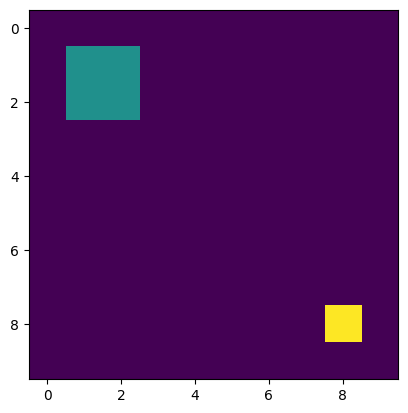

In [554]:
plt.imshow(raw)
plt.show()

In [555]:
mat= np.matrix(raw)
mat
with open('input.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%3d')

In [560]:
a = np.array(a)
a[a==65535]=0
a[a==-1]=0
mat= np.matrix(a)
mat
with open('hoang.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%3d')

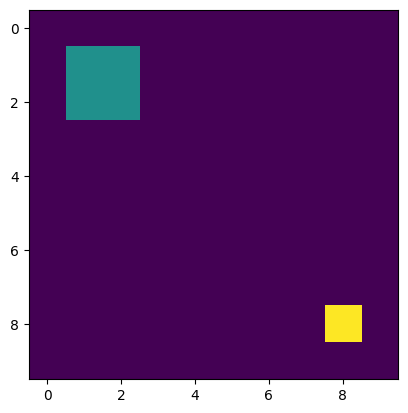

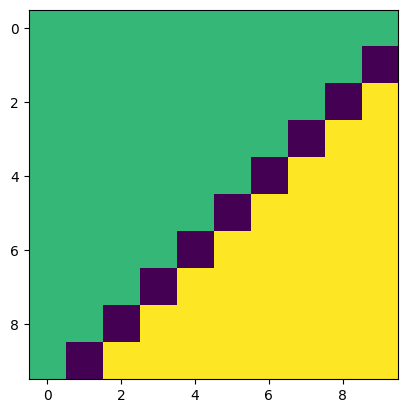

In [557]:
plt.imshow(raw)
plt.show()

plt.imshow(a)
plt.show()

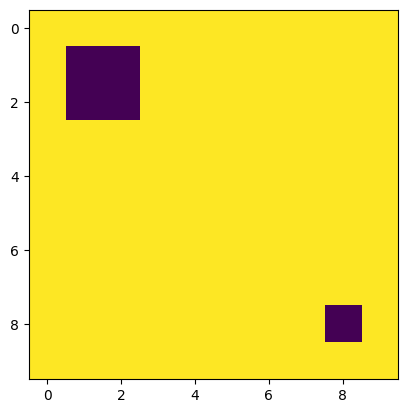

In [558]:
cp = np.array([[0]*N]*N)
for i in range(N):
  for j in range(N):
    if raw[i][j] == a[i][j]:
      cp[i][j] = 1
    else:
      cp[i][j] = 3000
plt.imshow(cp)
plt.show()